In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date
import file

In [2]:
all_option_leverage = file.load_all_option_leverage()
all_symbols = all_option_leverage.keys()

In [3]:
start_date = '2023-4-10' # start of MAGS history
# start_date = '2023-1-1' # start of uptrend
# start_date = '2021-1-1'
history_map = {}
symbols=[
        'USD',
        # 'SMH',
        'SPY','QQQ','BRK-B',
        'TQQQ','FNGS','MAGS',
        # 'SOXL',
        'IGM',
        #'MAGX',
        #'NVDA'
         ]
for symbol in symbols:
    tickerData = yf.Ticker(symbol)
    history = tickerData.history(interval='1wk', start=start_date, end=date.today()) # prices are adjusted for splits
    print(f'{symbol} history: {len(history)}w')
    history_map[symbol] = history

USD history: 111w
SPY history: 111w
QQQ history: 111w
BRK-B history: 111w
TQQQ history: 111w
FNGS history: 111w
MAGS history: 111w
IGM history: 111w


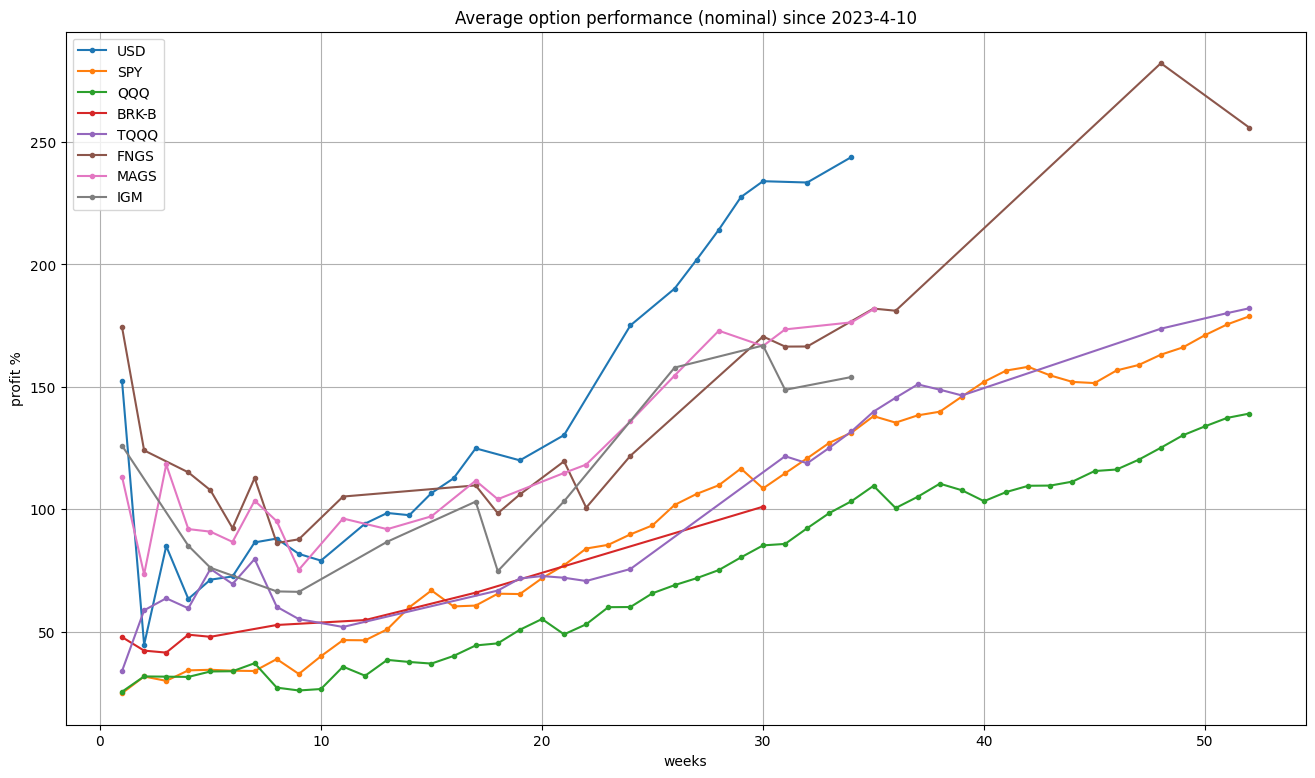

In [20]:
gap = 0 # %

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks > 52:
            break
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.mean() #* 52 / weeks
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Average option performance (nominal) since {start_date}')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

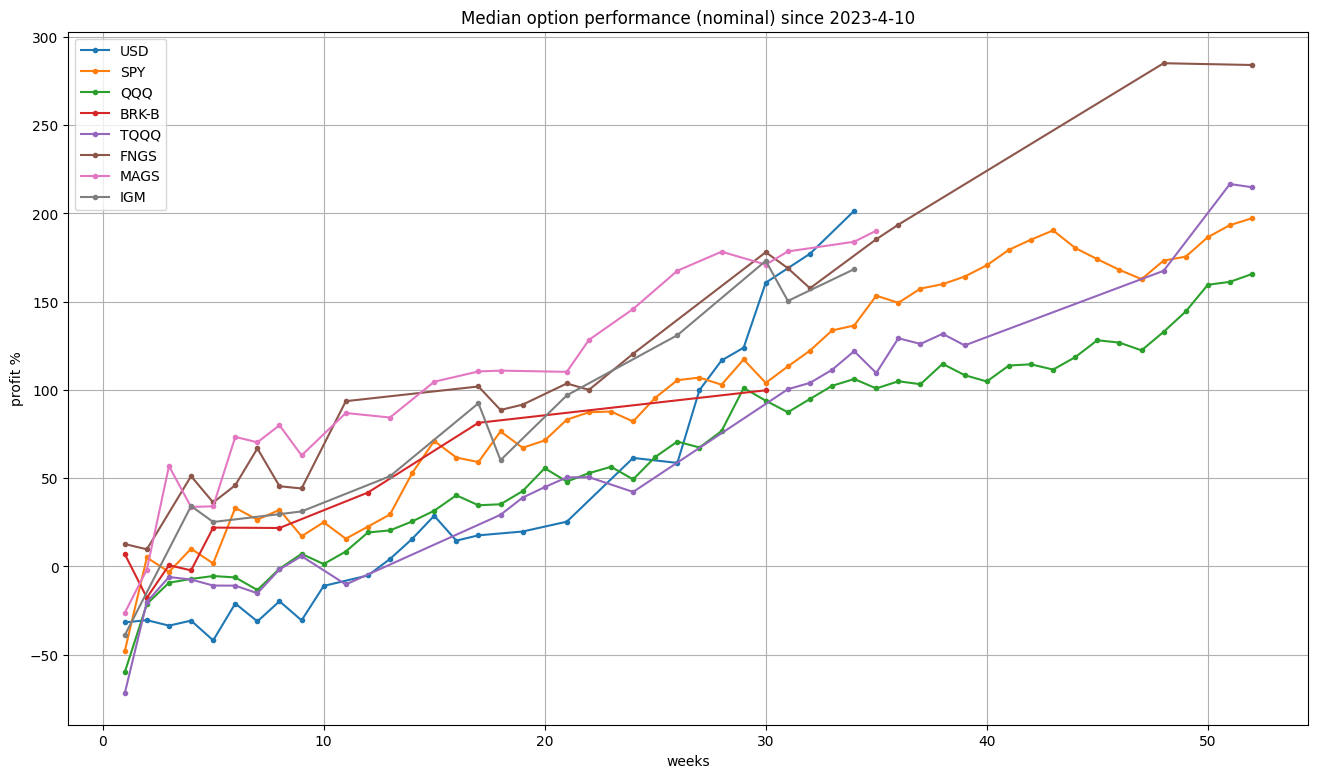

In [21]:
gap = 0 # %

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks > 52:
            break
        stock_changes = history['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
        profit = option_profits.median() #* 52 / weeks
        data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Median option performance (nominal) since {start_date}')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

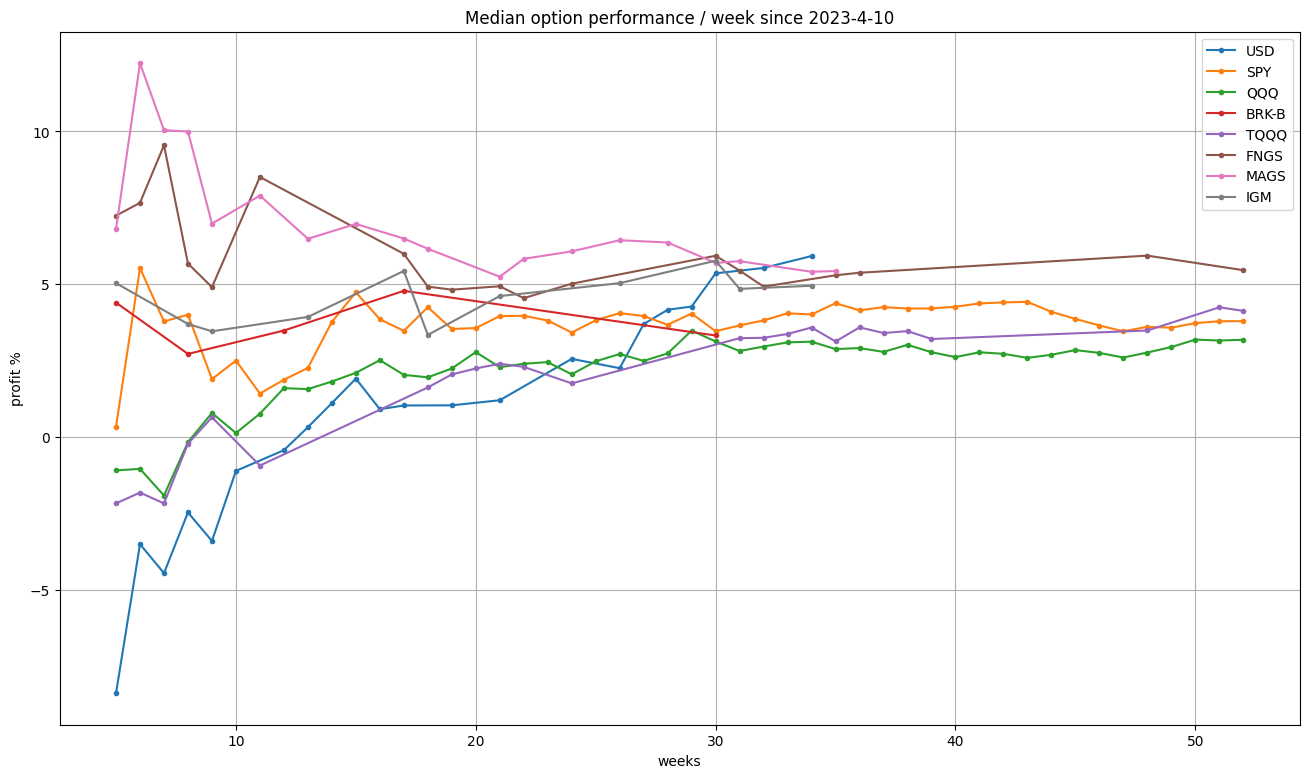

In [22]:
gap = 0 # %

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if 5 <= weeks <= 52:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.median() / weeks
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Median option performance / week since {start_date}')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

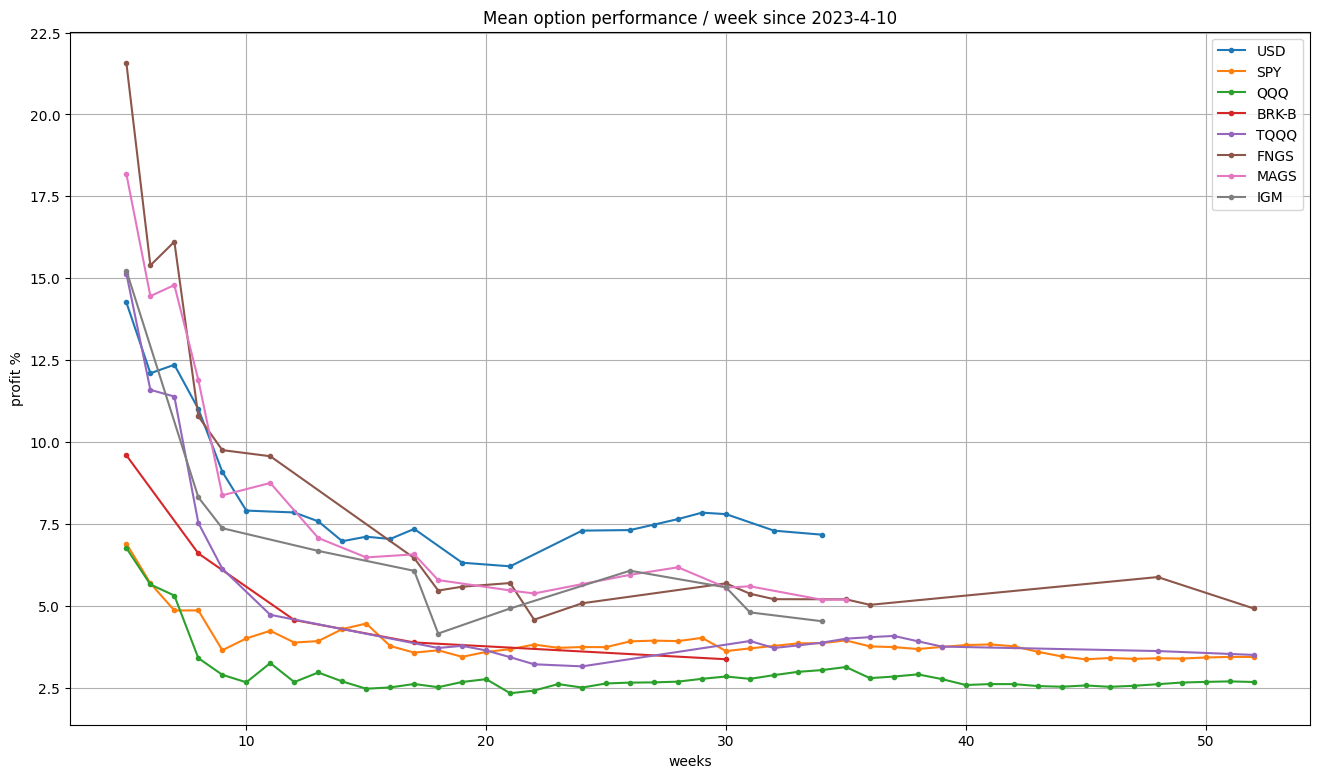

In [23]:
gap = 0 # %

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if 5 <= weeks <= 52:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() / weeks
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Mean option performance / week since {start_date}')
plt.xlabel('weeks')
plt.ylabel('profit %')
plt.grid()
plt.show()

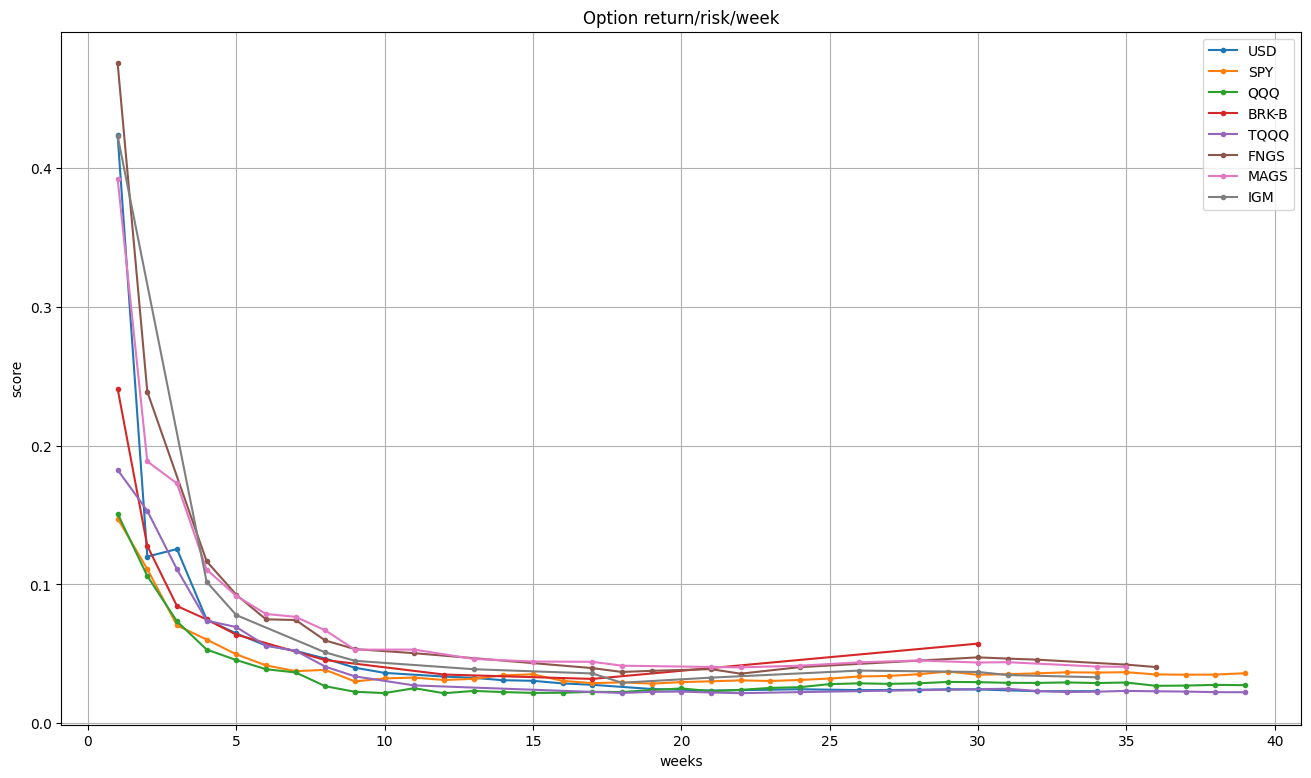

In [24]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, history in history_map.items():
    data = {}
    option_leverage = all_option_leverage[symbol]
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            stock_changes = history['Close'].pct_change(periods=weeks) * 100
            option_profits = ((stock_changes[weeks:] - gap) * lvr - 100).clip(lower=-100)
            profit = option_profits.mean() / weeks / option_profits.std()
            data[weeks] = profit
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option return/risk/week')
plt.xlabel('weeks')
plt.ylabel('score')
plt.grid()
plt.show()

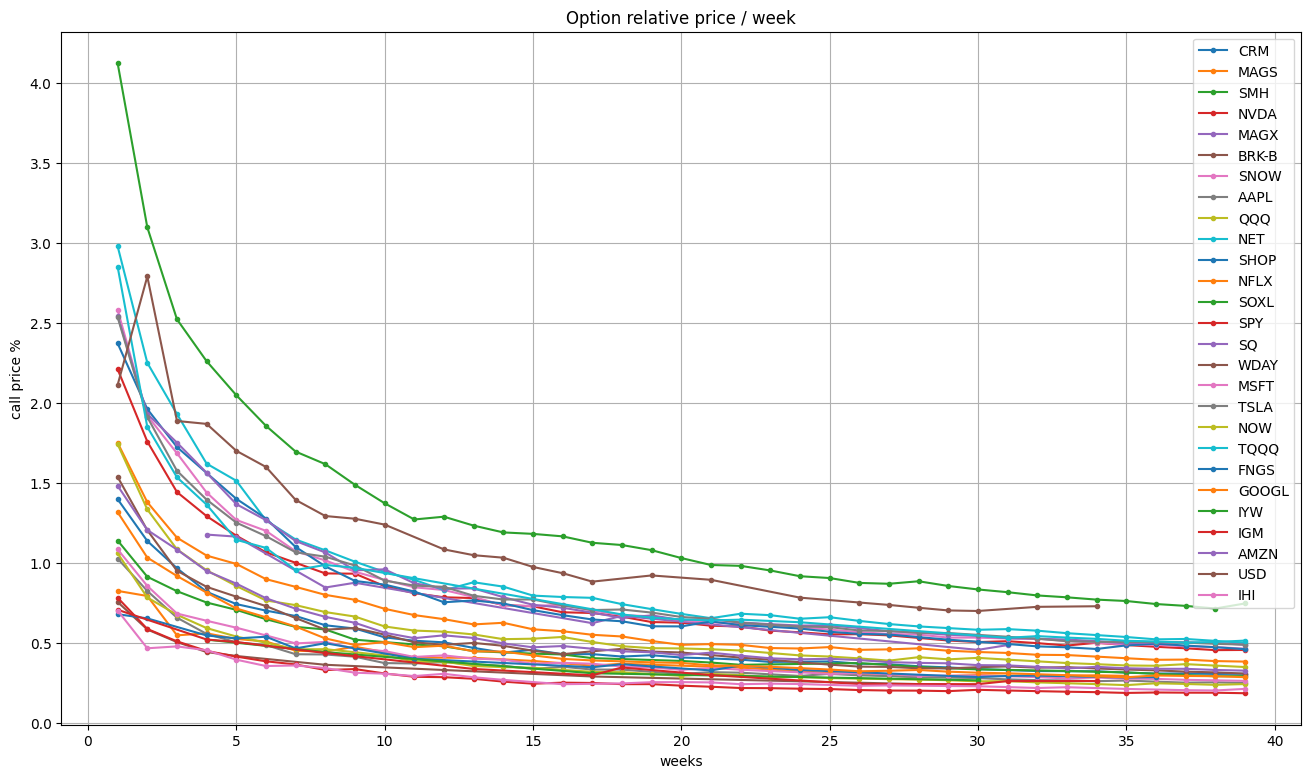

In [25]:
gap = 0 # %
max_weeks = 39 # 3Q

plt.figure(figsize=(16, 9))

for symbol, option_leverage in all_option_leverage.items():
    data = {}
    for weeks, lvr in sorted(option_leverage.items()):
        if weeks <= max_weeks:
            data[weeks] = (100 / lvr) / weeks
    plt.plot(*zip(*sorted(data.items())), label=symbol, marker='.')

plt.legend()
plt.title(f'Option relative price / week')
plt.xlabel('weeks')
plt.ylabel('call price %')
plt.grid()
plt.show()

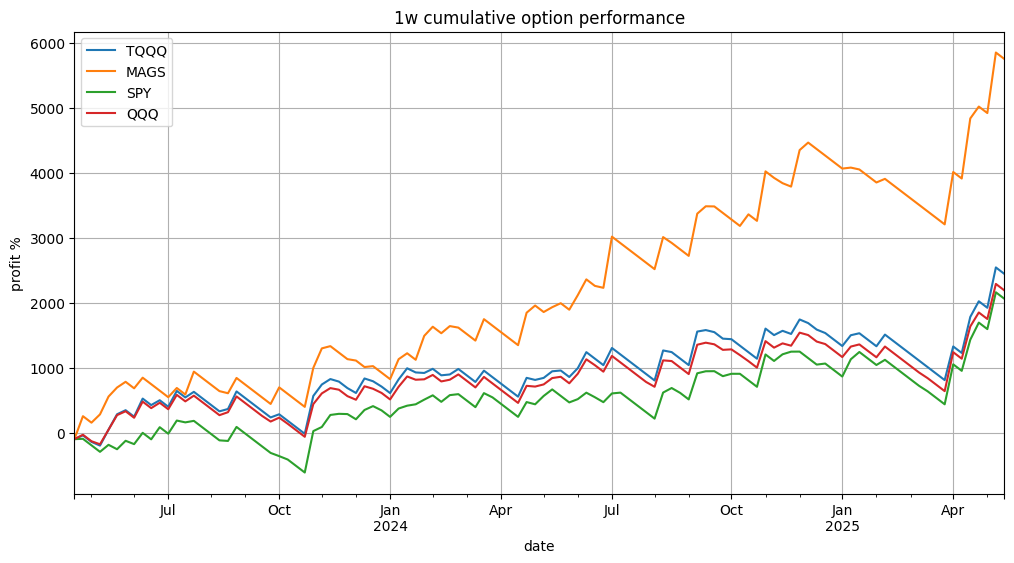

In [26]:
plt.figure(figsize=(12,6))

gaps = {
    'SPY': 0.5/600 * 100,
    'QQQ': 0.5/500 * 100,
    'TQQQ': 0.5/80 * 100,
    'MAGS': 0.5/50 * 100,
    'SOXL': 0.5/40 * 100,
}

df = pd.DataFrame()

weeks = 1
for symbol in ['TQQQ','MAGS','SPY','QQQ'
            #    'NVDA','SMH'
               ]:
    if symbol in all_option_leverage and weeks in all_option_leverage[symbol]:
        lvr = all_option_leverage[symbol][weeks]
        stock_changes = history_map[symbol]['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gaps[symbol]) * lvr - 100).clip(lower=-100)
        df[symbol] = option_profits
        option_profits.cumsum().plot(label=symbol)

plt.title(f'{weeks}w cumulative option performance')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()

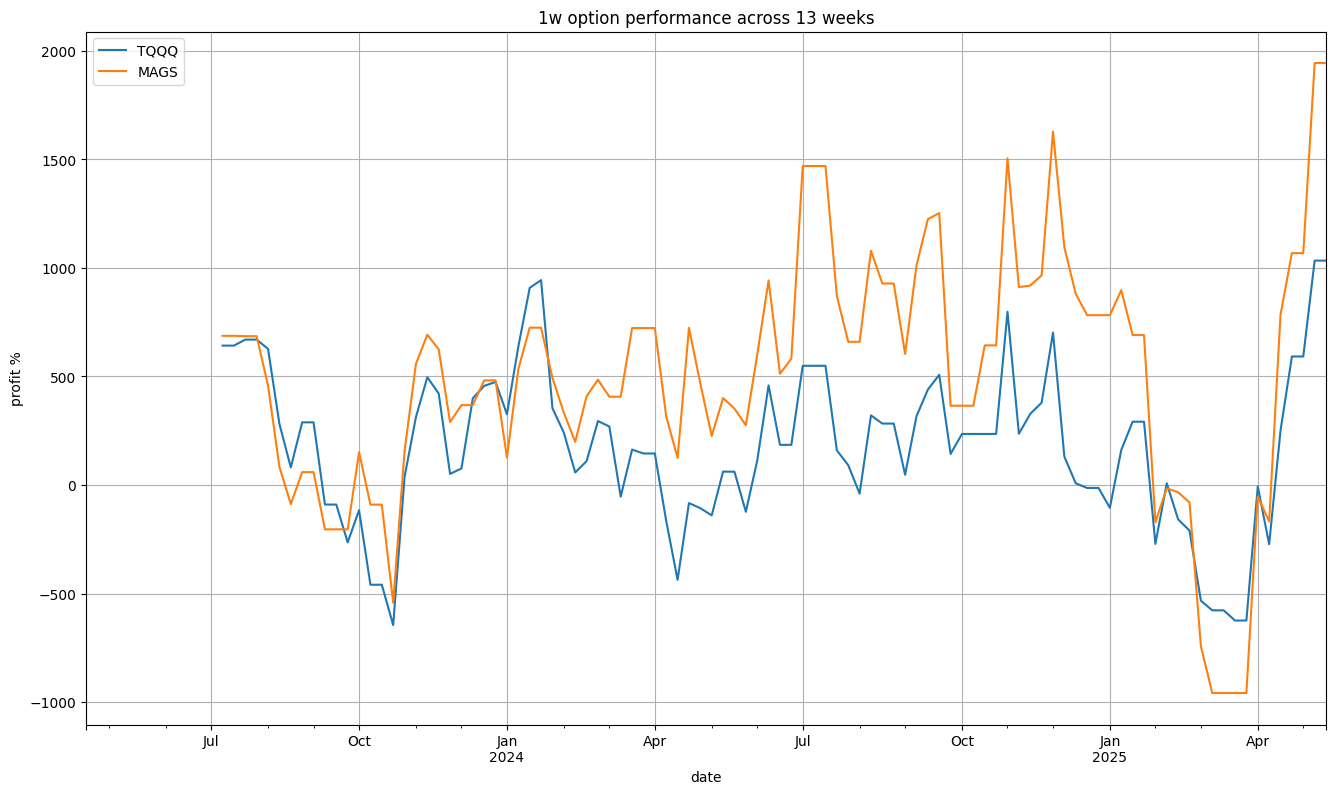

In [27]:
plt.figure(figsize=(16, 9))

weeks = 1
span = 13
for symbol in [
    'TQQQ', 'MAGS'
    # 'NVDA', 'SMH'
]:
    if symbol in all_option_leverage and weeks in all_option_leverage[symbol]:
        lvr = all_option_leverage[symbol][weeks]
        stock_changes = history_map[symbol]['Close'].pct_change(periods=weeks) * 100
        option_profits = ((stock_changes[weeks:] - gaps[symbol]) * lvr - 100).clip(lower=-100)
        # option_profits.cumsum().diff(periods=span).plot(label=symbol)
        option_profits.rolling(window=span).sum().plot(label=symbol)

plt.title(f'{weeks}w option performance across {span} weeks')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()